In [1]:
import numpy as np
import pandas as pd

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

import seaborn as sns
import scipy as sp
import warnings 
import os
warnings.simplefilter(action='ignore', category=Warning)
import datetime

# LOADING DATA

In [10]:
data=pd.read_csv('dataset.csv', header = 0) 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [13]:
data.shape

(569, 32)

In [14]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [15]:
data.value_counts

<bound method DataFrame.value_counts of             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280       

In [16]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

# EDA

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

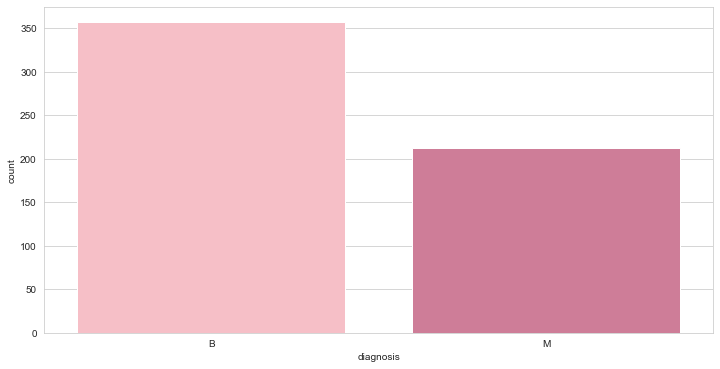

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=data, palette=["#FFB6C1", "#DB7093"])

In [26]:
pd.value_counts(data['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

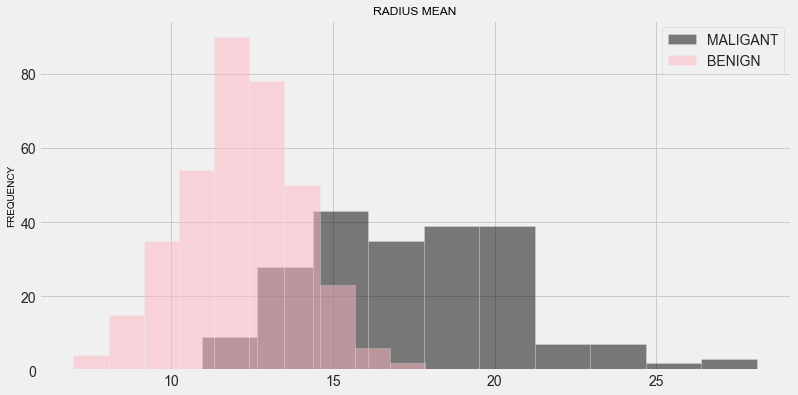

In [34]:
#Radius mean
plt.hist(data["radius_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["radius_mean"][data["diagnosis"]=="B"],color="#FFB6C1",alpha=0.5)
plt.title("RADIUS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

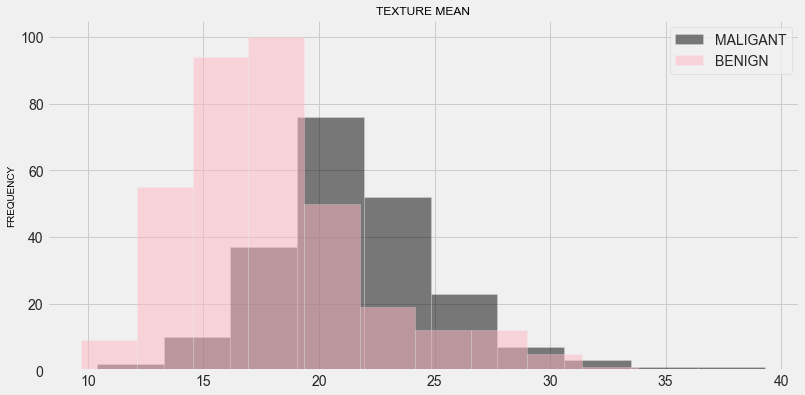

In [35]:
#Texture Mean
plt.hist(data["texture_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["texture_mean"][data["diagnosis"]=="B"],color="#FFB6C1",alpha=0.5)
plt.title("TEXTURE MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

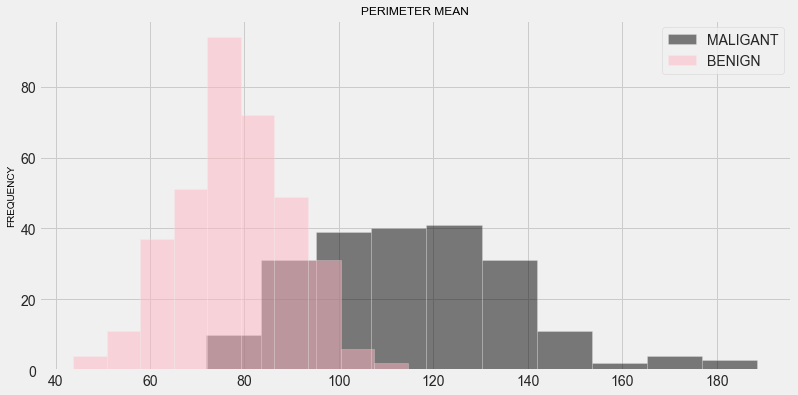

In [36]:
#Perimeter Mean
plt.hist(data["perimeter_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["perimeter_mean"][data["diagnosis"]=="B"],color="#FFB6C1",alpha=0.5)
plt.title("PERIMETER MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

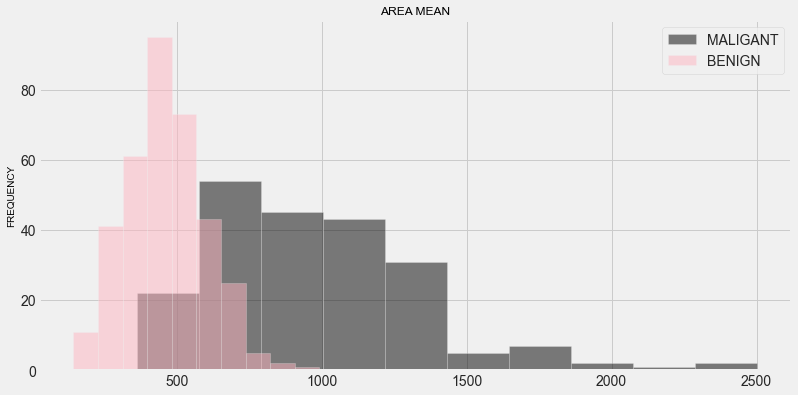

In [37]:
#Area Mean
plt.hist(data["area_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["area_mean"][data["diagnosis"]=="B"],color="#FFB6C1",alpha=0.5)
plt.title("AREA MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

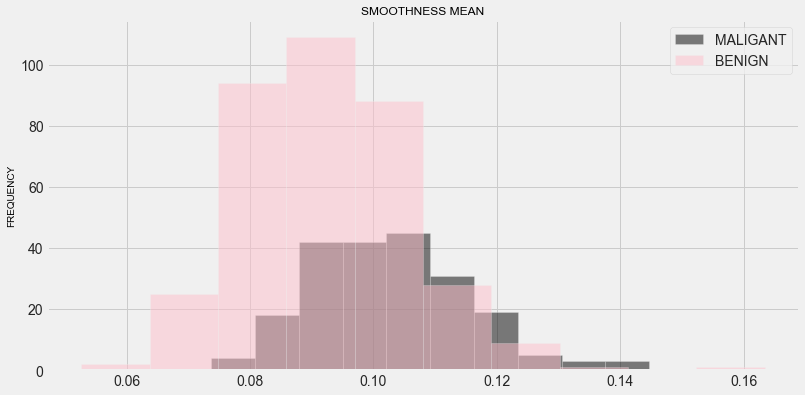

In [38]:
#Smoothness Mean
plt.hist(data["smoothness_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["smoothness_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("SMOOTHNESS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

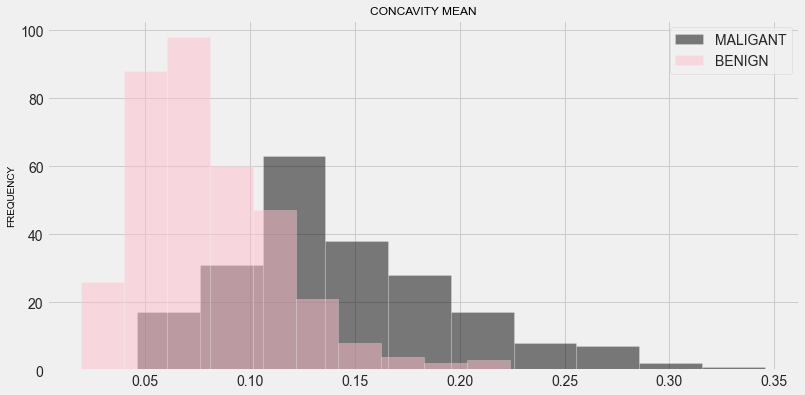

In [39]:
#Compactness Mean
plt.hist(data["compactness_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["compactness_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("CONCAVITY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

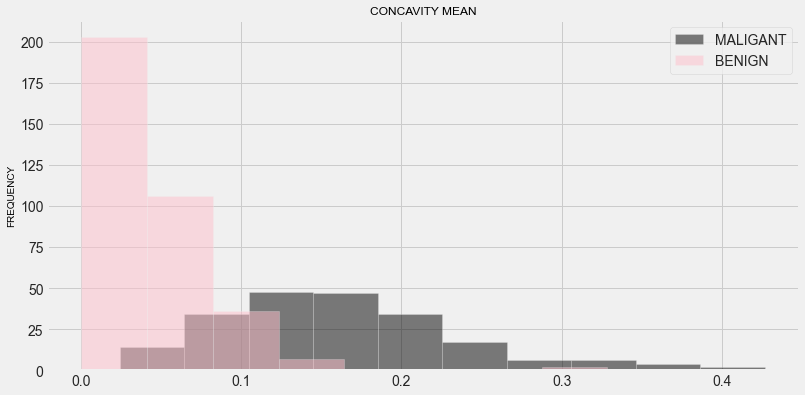

In [41]:
#Concavity Mean
plt.hist(data["concavity_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["concavity_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("CONCAVITY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

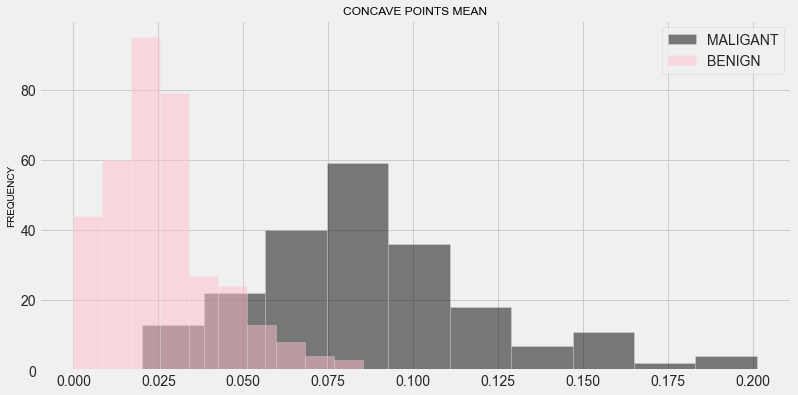

In [43]:
#Concave Points Mean
plt.hist(data["points_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["points_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("CONCAVE POINTS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

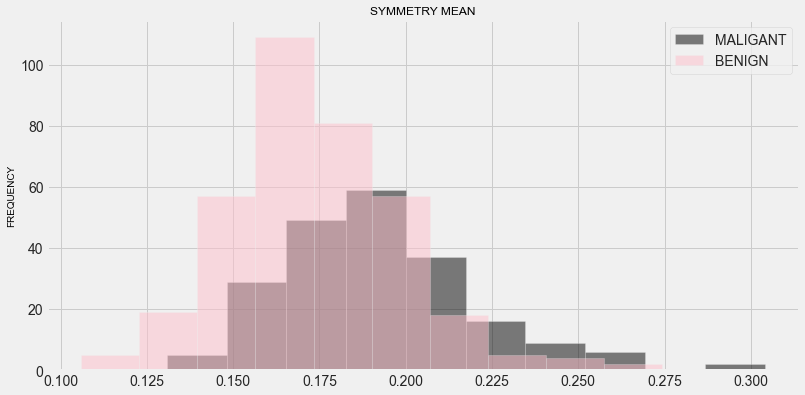

In [44]:
#Symmetry Mean
plt.hist(data["symmetry_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["symmetry_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("SYMMETRY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

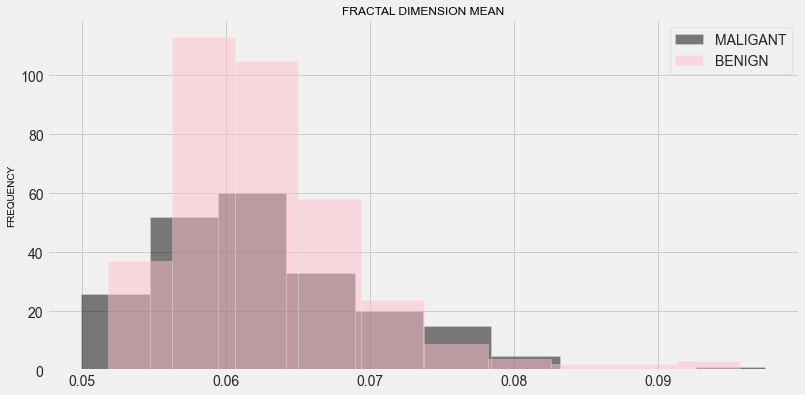

In [46]:
#Fractal Dimension Mean
plt.hist(data["dimension_mean"][data["diagnosis"]=="M"],color="black",alpha=0.5)
plt.hist(data["dimension_mean"][data["diagnosis"]=="B"],color="pink",alpha=0.5)
plt.title("FRACTAL DIMENSION MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

Above observations show that,
**Cell radius,
Perimeter,
Area,
Compactness,
Concavity,
Concave Points**
can be used for classification of cancer.

Texture,
Smoothness,
Symmetry,
Dimension
don't show the preference in one diagnosis or the other.



In [47]:
data.corr

<bound method DataFrame.corr of             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06

# DATA MODELS

In [49]:
#Features
x = data.drop(columns = 'diagnosis')

#Target
y = data['diagnosis']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

In [51]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


# KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the K Neareset Neighbors Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
knn_results=accuracy_score(y_test, y_pred)*100

              precision    recall  f1-score   support

           B       0.74      0.90      0.81       113
           M       0.67      0.38      0.48        58

    accuracy                           0.73       171
   macro avg       0.70      0.64      0.65       171
weighted avg       0.71      0.73      0.70       171

[[102  11]
 [ 36  22]]
Training Score:  79.64824120603015
The accuracy of the K Neareset Neighbors Classifier Model is:  72.51461988304094 %
